In [42]:
import os, sys, glob, shutil
import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math
from IPython.display import Image, display
%matplotlib inline
nmer = 5
mpl.rcParams.update({'font.size': 16})

In [17]:
#
import os
import subprocess

# Loop through each directory in the current working directory
for state_dir in os.listdir('.'):
    if os.path.isdir(state_dir) and state_dir.startswith('state_'):
        input_gro = os.path.join(state_dir, 'HREMD.part0001.gro')
        output_gro = os.path.join(state_dir, 'HREMD_withoutwater.part0001.gro')
        command = f'echo "24\nq\n" | gmx editconf -f {input_gro} -n index.ndx -o {output_gro}'
        
        # Run the command
        try:
            subprocess.run(command, shell=True, check=True)
            print(f"Processed {input_gro}")
        except subprocess.CalledProcessError as e:
            print(f"Failed to process {input_gro}: {e}")


                     :-) GROMACS - gmx editconf, 2020.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3664 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed state_3/HREMD.part0001.gro
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.2165 nm^3, corresponds to roughly 23000 electrons
Velocities found
Selected 24: 'peptoid'
Processed state_4/HREMD.part0001.gro
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.5366 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed state_5/HREMD.part0001.gro
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3337 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed state_2/HREMD.part0001.gro
Note tha

In [43]:
# Define the directory path
directory = "omega_data/"

# Check if the directory exists
if os.path.exists(directory):
    # Remove all contents of the directory
    shutil.rmtree(directory)
    # Recreate the empty directory
    os.makedirs(directory)
    print(f"All contents in '{directory}' have been cleared.")
else:
    # Create the directory if it does not exist
    os.makedirs(directory)
    print(f"Directory '{directory}' did not exist, so it has been created.")


All contents in 'omega_data/' have been cleared.


In [44]:
# Define omega dihedral indices, gromcas start from 1, while np start from 0
omega_dihedral_indices = np.array([
    [  4,   5,  18,  27],
    [ 27,  28,  41,  45],
    [ 45,  46,  57,  66],
])

# Ensure the omega_data directory exists
omega_path = 'omega_data/'
if not os.path.exists(omega_path):
    os.makedirs(omega_path)

# Calculate omegas for each state
for state in range(6):
    xtcfile = f"state_{state}/HREMD.part0001.xtc"
    grofile = f"state_{state}/HREMD_withoutwater.part0001.gro"
    traj = md.load(xtcfile, top=grofile)
    omegas = md.compute_dihedrals(traj, omega_dihedral_indices) * (180.0 / math.pi)

    # Save omegas
    outfile = os.path.join(omega_path, f"omegas_state{state}.npy")
    np.save(outfile, omegas)
    print(f"Saved omegas for state {state} to {outfile}")

Saved omegas for state 0 to omega_data/omegas_state0.npy
Saved omegas for state 1 to omega_data/omegas_state1.npy
Saved omegas for state 2 to omega_data/omegas_state2.npy
Saved omegas for state 3 to omega_data/omegas_state3.npy
Saved omegas for state 4 to omega_data/omegas_state4.npy
Saved omegas for state 5 to omega_data/omegas_state5.npy


In [45]:
print(np.load('omega_data/omegas_state0.npy')[:5])

[[-167.01532 -174.34724 -133.60951]
 [-160.42911 -172.5973  -171.20451]
 [-165.90155  172.99641 -163.39728]
 [ 151.33412  179.10626  179.16806]
 [-161.3681   144.2551   162.04622]]


In [8]:
initial_state = [0, 1, 2, 3, 4, 5]
logfile = 'state_0/HREMD.part0001.log'
pattern = 'Repl ex'
output_file = 'state0_log.dat'

try:
    states = [initial_state[:]]  # Make a copy of initial_state

    with open(logfile, 'r') as file:
        lines = file.readlines()

        for line in lines:
            if pattern in line:
                parts = line.strip().split()
                for i in range(2, len(parts)):
                    if 'x' in parts[i]:
                        index1 = int(parts[i-1])
                        index2 = int(parts[i+1])
                        # Swap the positions
                        states[-1][index1], states[-1][index2] = states[-1][index2], states[-1][index1]
                states.append(states[-1][:])  # Append a copy of the last state

    # Write states to output_file
    with open(output_file, 'w') as outfile:
        for state in states:
            outfile.write(' '.join(map(str, state)) + '\n')

    print(f"Output saved to {output_file}")


    with open(output_file, 'r+') as file: #check the first line 
        lines = file.readlines()

        if lines[0] != '0 1 2 3 4 5\n':
            lines.insert(0, '0 1 2 3 4 5\n')
            file.seek(0)
            file.writelines(lines)

except FileNotFoundError:
    print(f"The file {logfile} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


Output saved to state0_log.dat


In [46]:
# Load in the omega values for all replicas
all_omegas = []
for state in range(6):  # Adjust the range to include all replicas
    all_omegas.append(np.load(f"omega_data/omegas_state{state}.npy"))
all_omegas = np.array(all_omegas)  # (nreps, nsnaps, nresidues)
print('all_omegas.shape', all_omegas.shape)
#print(all_omegas[:5])

# Arrange each snapshot by replica (not temp)
replica_indices = np.loadtxt('state0_log.dat')
print("replica_indices.shape", replica_indices.shape)

start = 0
nsnaps = 50001
nreps = 6
for i in range(nsnaps):
    Ind = np.argsort(replica_indices[i, :])
    all_omegas[:, i, :] = all_omegas[Ind, i, :]

# Save the data for each state once
for rep in range(nreps):
    np.save(f"omega_data/omegas_rep{rep}.npy", all_omegas[rep, :, :])
    print(f"Saved omegas for replica {rep} to omega_data/omegas_rep{rep}.npy")
    #print(np.load(f'omega_data/omegas_rep{rep}.npy')[:5])

all_omegas.shape (6, 50001, 3)
replica_indices.shape (50001, 6)
Saved omegas for replica 0 to omega_data/omegas_rep0.npy
Saved omegas for replica 1 to omega_data/omegas_rep1.npy
Saved omegas for replica 2 to omega_data/omegas_rep2.npy
Saved omegas for replica 3 to omega_data/omegas_rep3.npy
Saved omegas for replica 4 to omega_data/omegas_rep4.npy
Saved omegas for replica 5 to omega_data/omegas_rep5.npy


In [47]:
# Adjust omega values into the range (-90, 270)
all_omegas = (all_omegas + 90.0) % 360.0 - 90.0

start = 0
nsnaps = 50001
nreps = 6
residues_to_plot = [0, 1, 2]

# Plot omega angles vs time for selected residues for each replica
for i in range(nreps):
    plt.figure(figsize=(10, 10))
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(num_residues, 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, all_omegas[i, start:nsnaps, residue])
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ res {residue} (deg)')
        plt.title(f'Omega angles vs Time for residue (Replica {i}) in 19AE1-4-A')
    plt.tight_layout()
    plt.savefig(f'omega_data/Omega_angles_vs_Time_for_residue_Replica_{i}_in_19AE1-4-A.png')
    print(f"Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_{i}_in_19AE1-4-A.png")
    plt.clf()  # Clear the figure for the next set of plots

Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_0_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_1_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_2_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_3_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_4_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_Replica_5_in_19AE1-4-A.png


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

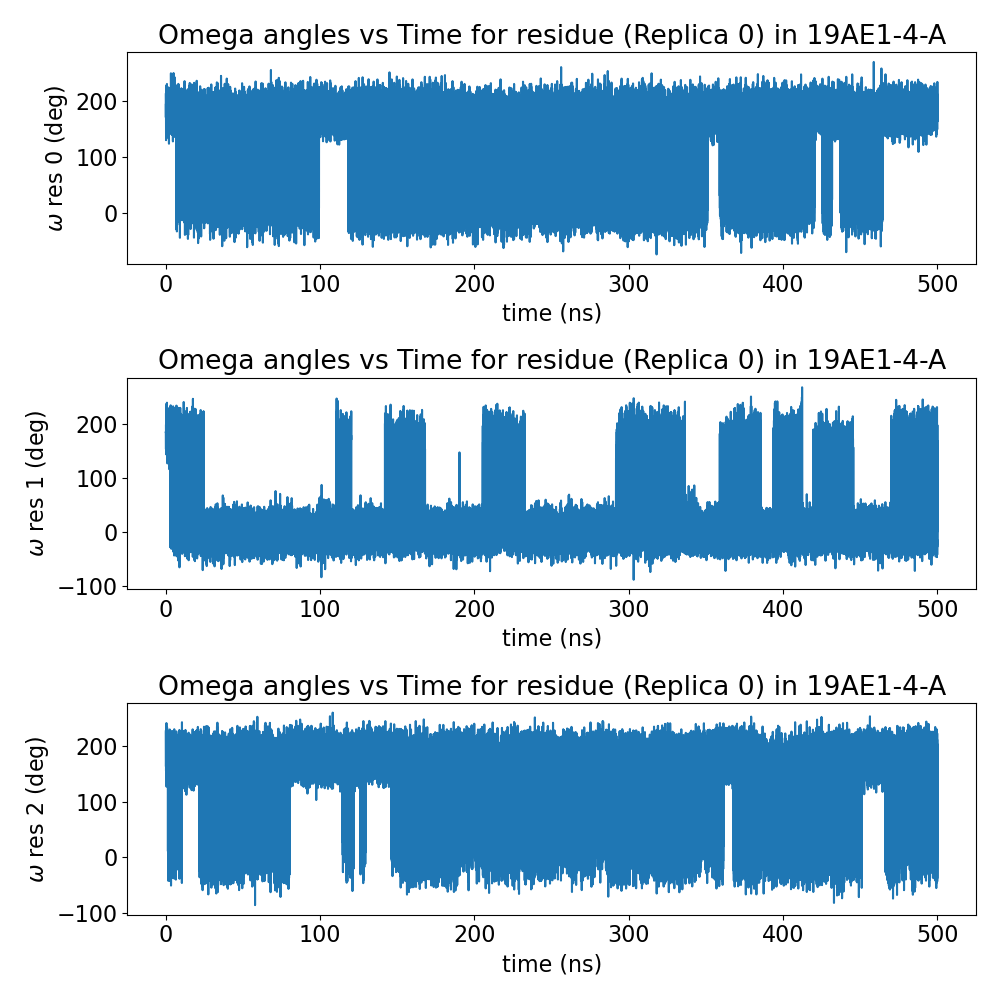

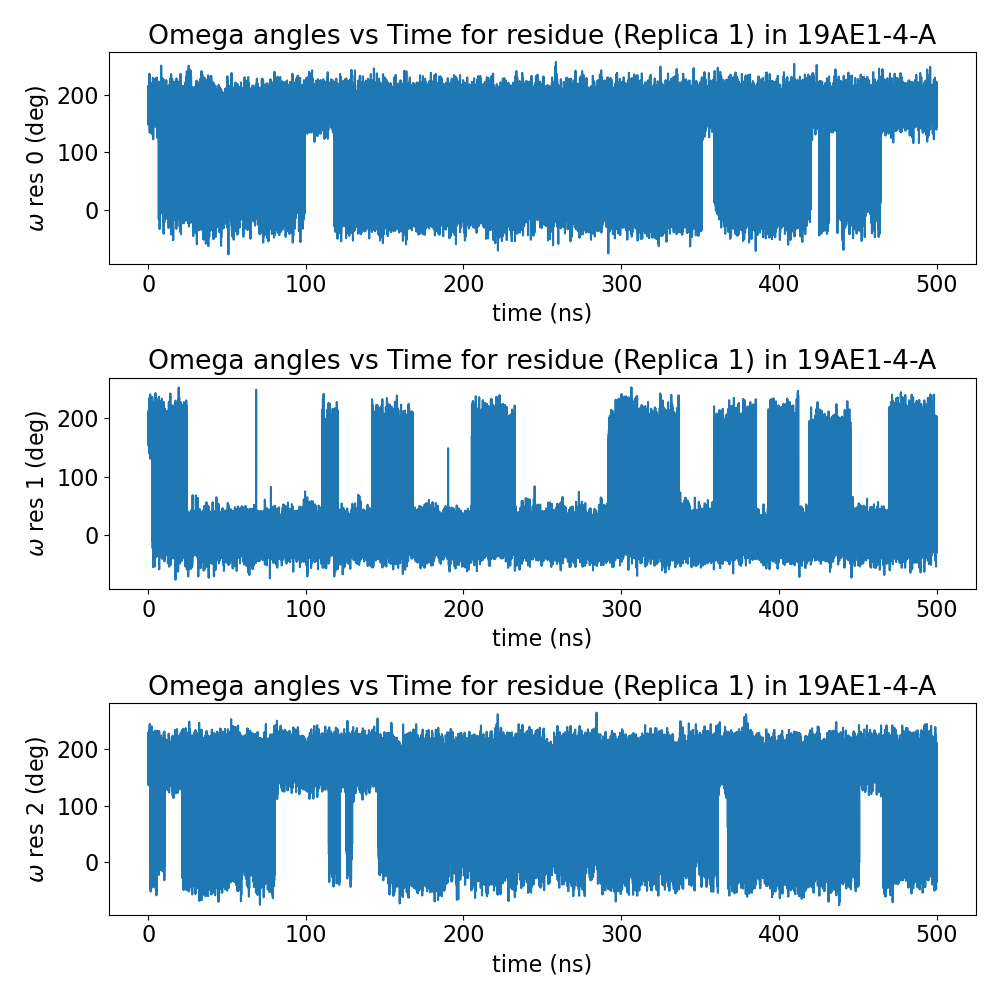

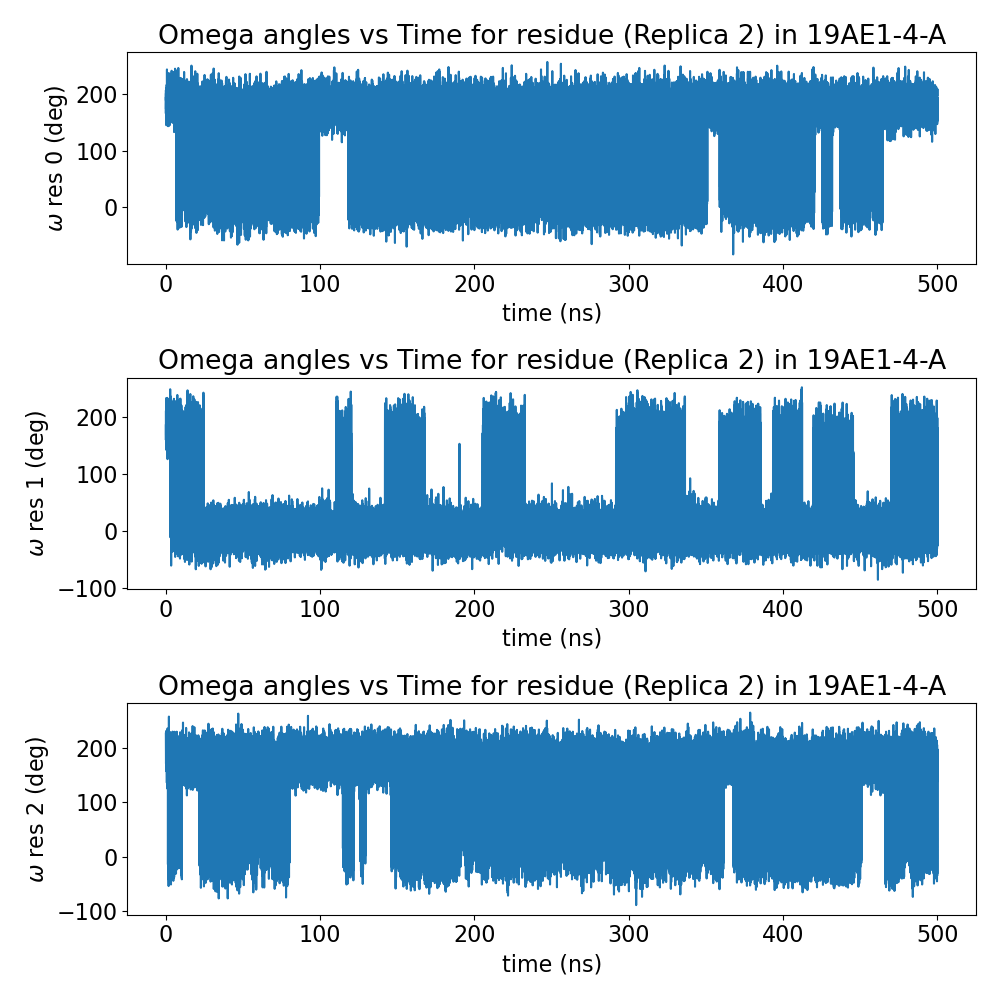

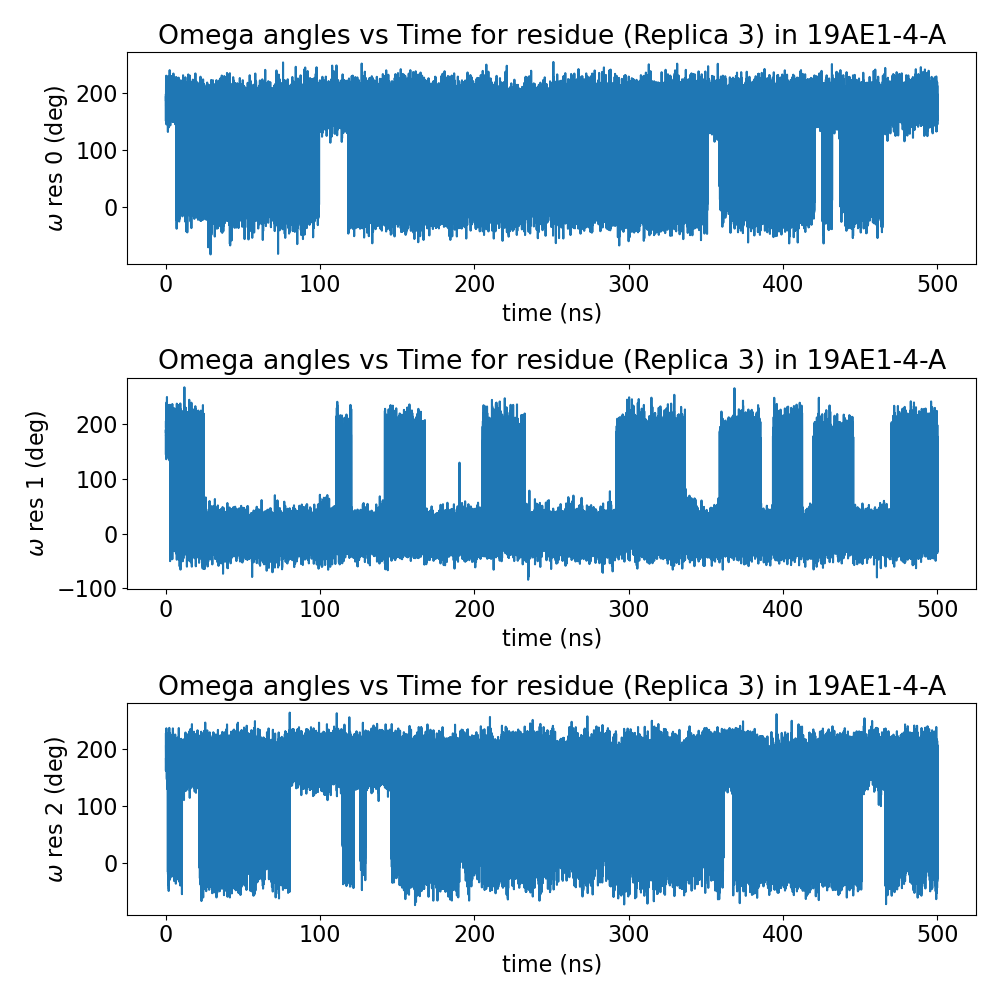

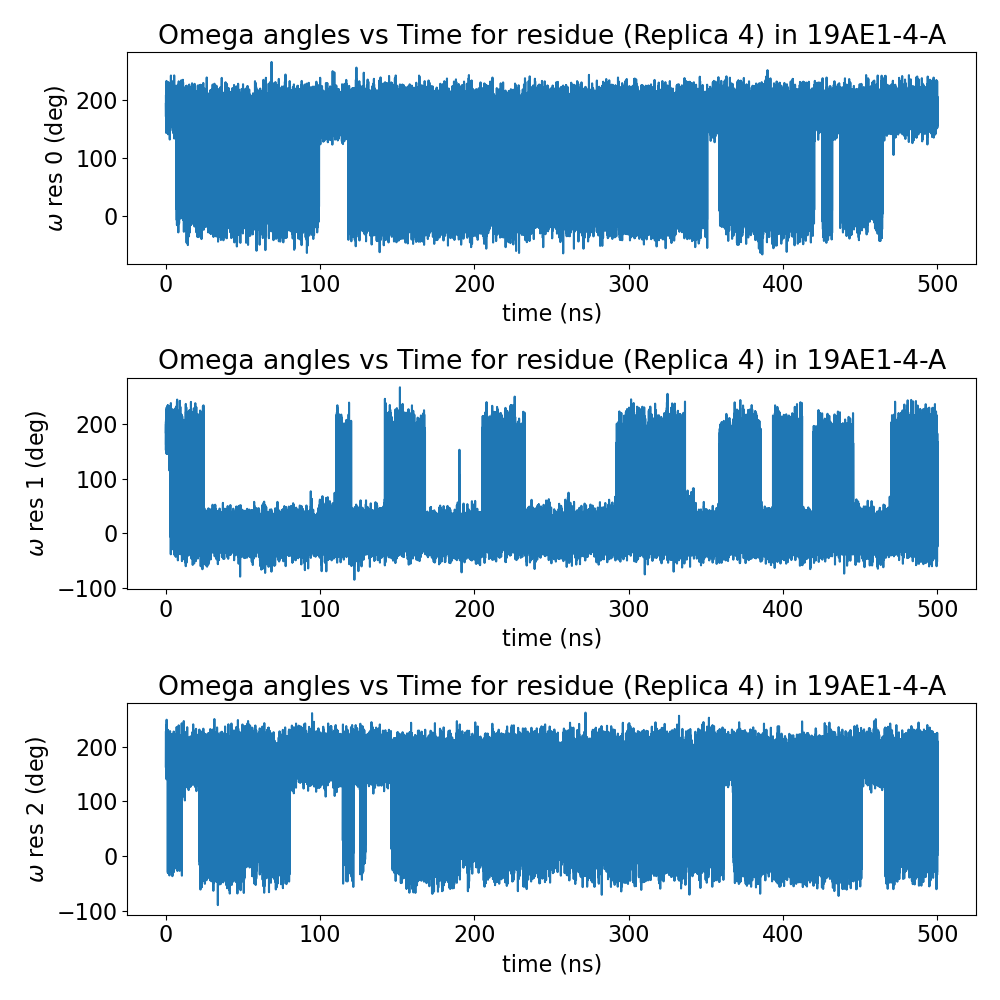

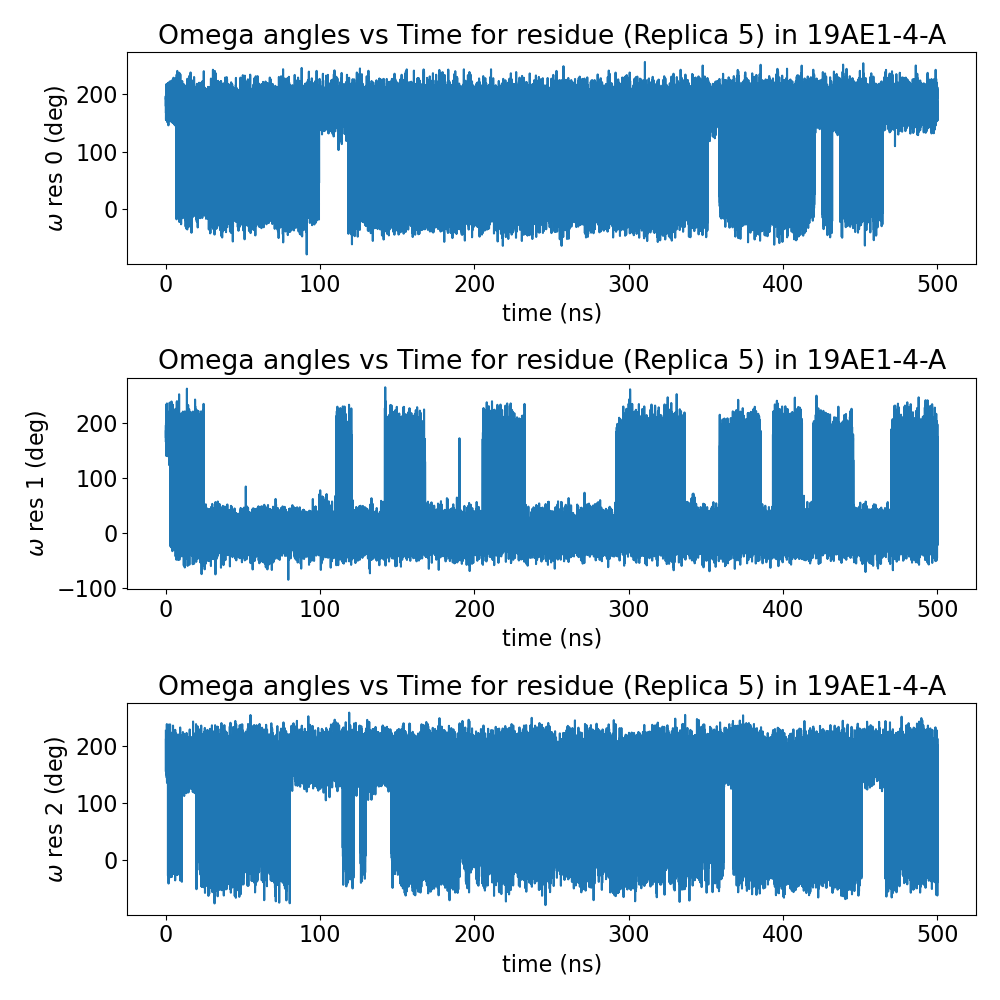

In [48]:
# Display one of the generated PNG files
for i in range(6):
    display(Image(f'omega_data/Omega_angles_vs_Time_for_residue_Replica_{i}_in_19AE1-4-A.png'))

In [49]:
# Plot omega angles vs time for selected residues for each replica
for residue in residues_to_plot:
    plt.figure(figsize=(10, 10))
    for i in range(nreps):
        plt.subplot(nreps, 1, i + 1)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, all_omegas[i, start:nsnaps, residue])
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ res {residue} (deg)')
        plt.title(f'Omega angles vs Time for residue {residue} (Replica {i}) in 19AE1-4-A')
    plt.tight_layout()
    plt.savefig(f'omega_data/Omega_angles_vs_Time_for_residue_{residue}_in_19AE1-4-A.png')
    print(f"Saved at: omega_data/Omega_angles_vs_Time_for_residue_{residue}_in_19AE1-4-A.png")
    plt.clf()  # Clear the figure for the next set of plots

Saved at: omega_data/Omega_angles_vs_Time_for_residue_0_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_1_in_19AE1-4-A.png
Saved at: omega_data/Omega_angles_vs_Time_for_residue_2_in_19AE1-4-A.png


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

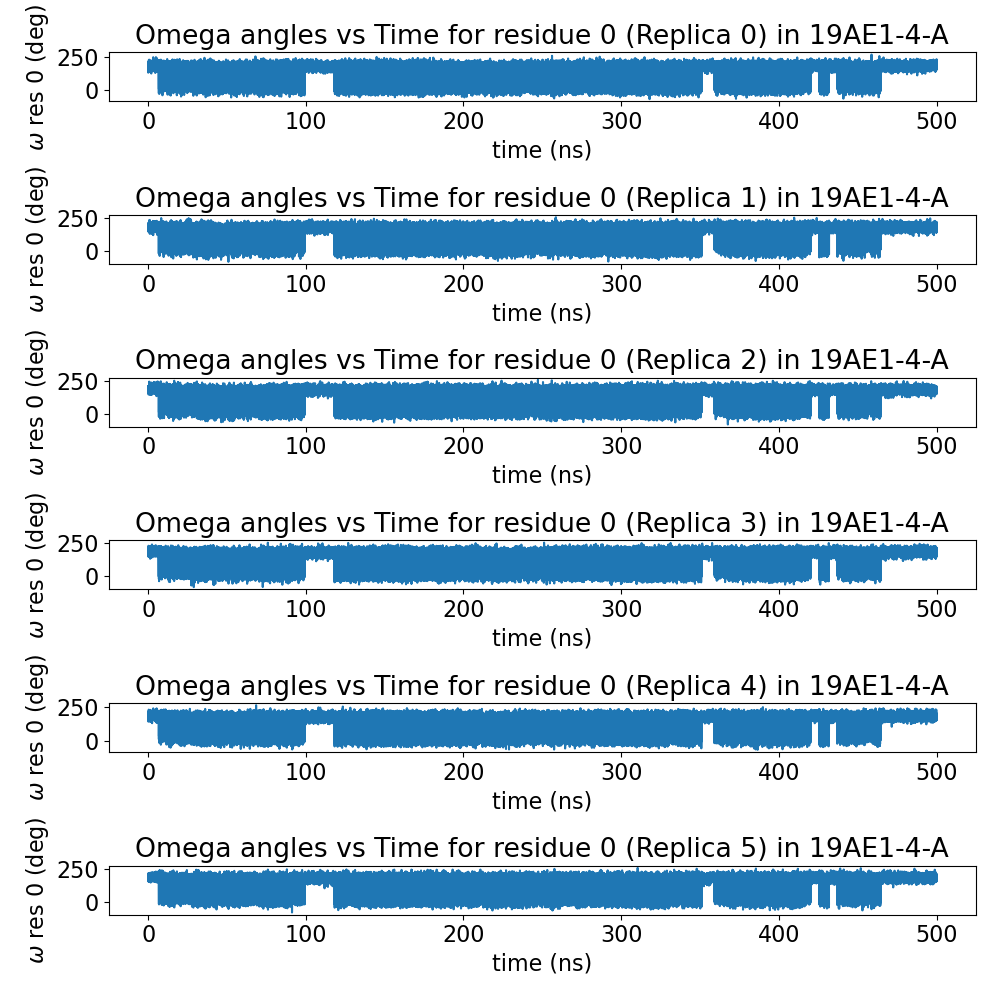

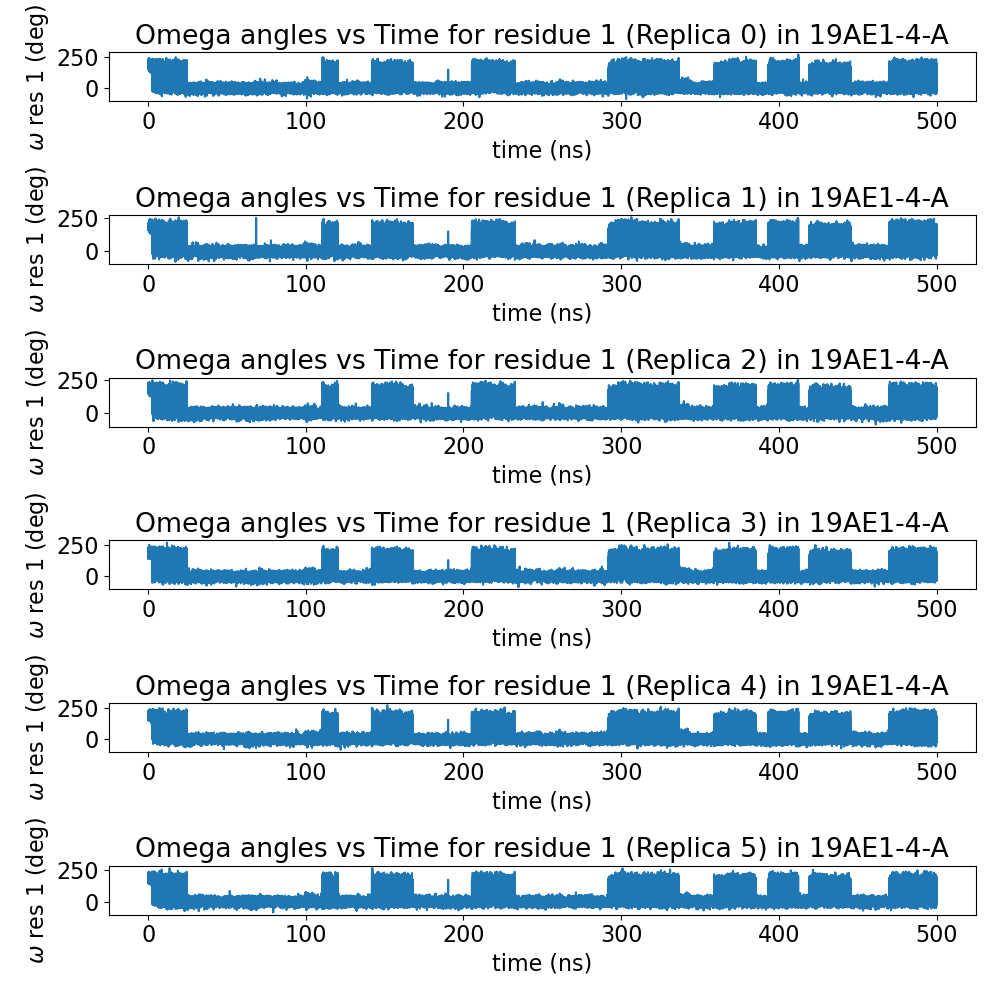

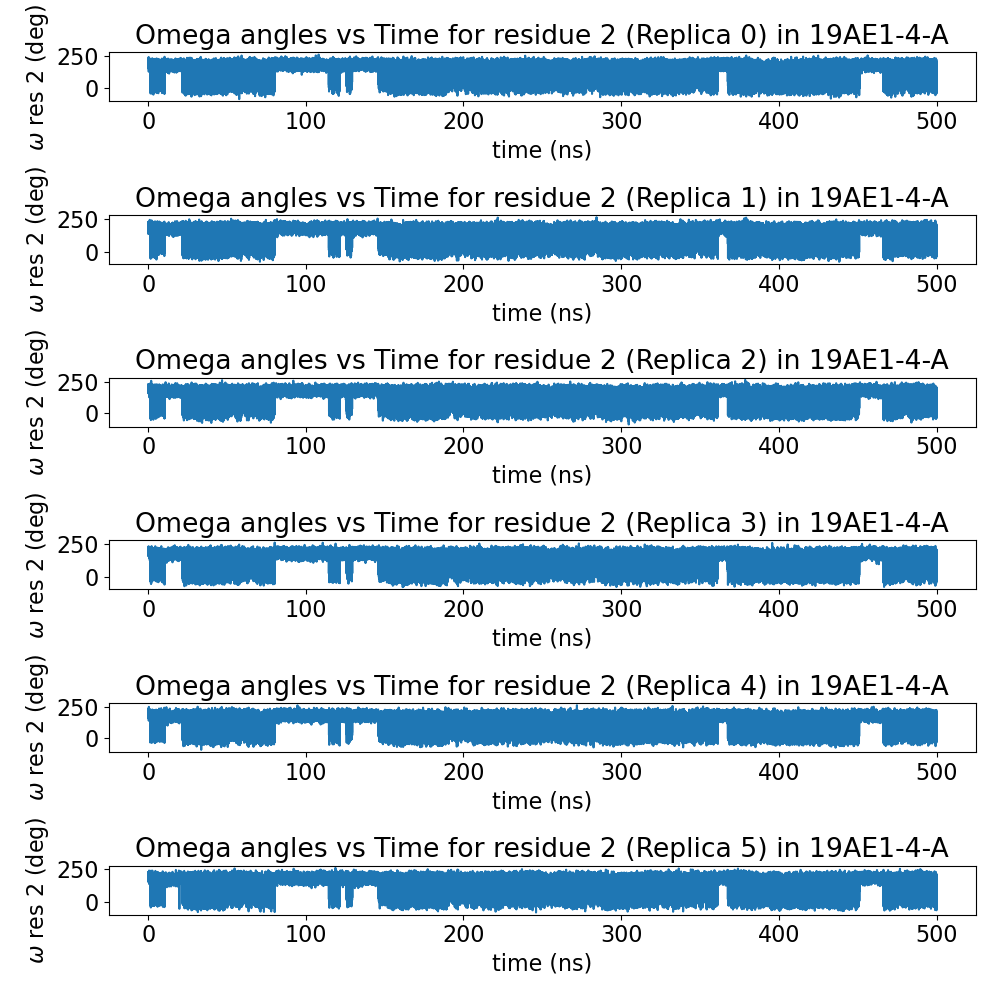

In [51]:
for i in range(3):
    display(Image(f'omega_data/Omega_angles_vs_Time_for_residue_{i}_in_19AE1-4-A.png'))

(50001, 3)


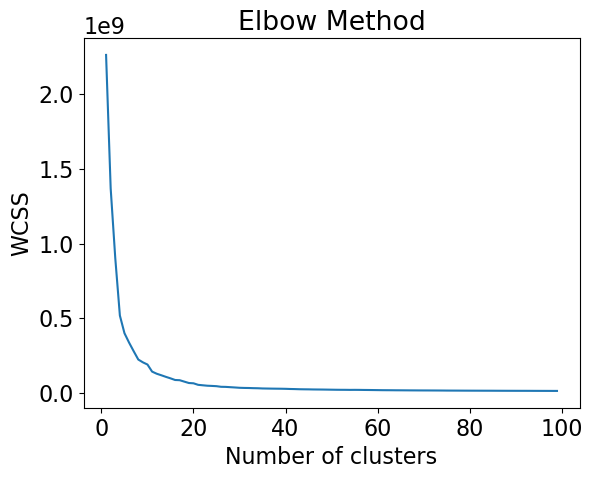

In [79]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the omegas data
omegas = np.load('omega_data/omegas_rep0.npy')
#print(omegas[:10])
print(omegas.shape)

wcss = [] # within-cluster sum of squares
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(omegas)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 100), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [110]:
optimal_clusters = 8  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(omegas)

cluster_labels = kmeans.labels_
# Count the number of data points in each cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

# Create a DataFrame for better formatting
cluster_info = pd.DataFrame({'Cluster': unique_labels, 'Count': counts})

# Print the cluster info
print(cluster_info)

   Cluster  Count
0        0   8749
1        1   3236
2        2   8170
3        3   9842
4        4   3135
5        5   8922
6        6   4391
7        7   3556


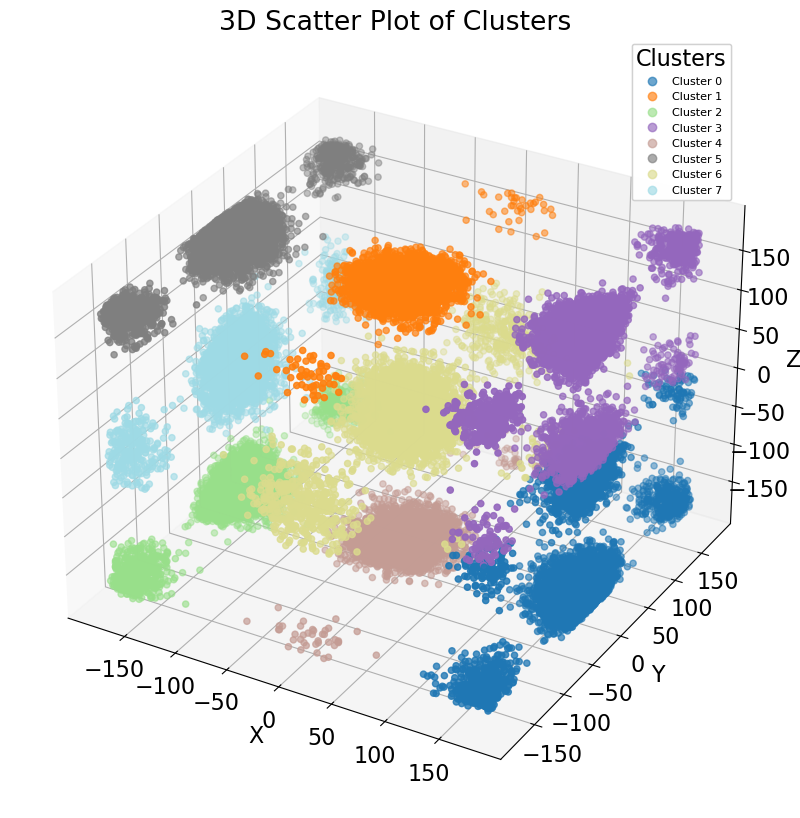

In [111]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot of clusters
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(omegas[:, 0], omegas[:, 1], omegas[:, 2], c=cluster_labels, cmap='tab20')  # Use 'tab20' colormap for distinct colors

ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create a legend and place it in the upper right corner
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
# Format the labels correctly without conversion
legend1 = ax.legend(handles, [f"Cluster {i}" for i in range(optimal_clusters)], title="Clusters", loc="upper left", bbox_to_anchor=(0.8, 1), prop={'size': 8})
ax.add_artist(legend1)

plt.show()

In [ ]:
# Initialize KMeans estimator
estimator = KMeans(
    n_clusters=3,  # number of clusters
    init_strategy='uniform',  # uniform initialization strategy
    max_iter=0,  # don't actually perform the optimization, just place centers
    fixed_seed=13,
    n_jobs=8,
    progress=tqdm
)

# Perform clustering
clustering = estimator.fit(omegas).fetch_model()
assignments = clustering.transform(omegas)

# Plot the results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
f.suptitle('Cluster centers and assignments directly after uniform initialization')

# Assuming 'samples' variable refers to the same data as 'omegas'
ax1.hexbin(*(omegas.T), bins='log')
ax1.scatter(*(clustering.cluster_centers.T), marker='o', c='m')
ax1.axis('off')
ax1.set_title('cluster centers')

ax2.scatter(*(omegas[::10].T), c=assignments[::10])
ax2.axis('off')
ax2.set_title('assignments of data to centers')

plt.show()

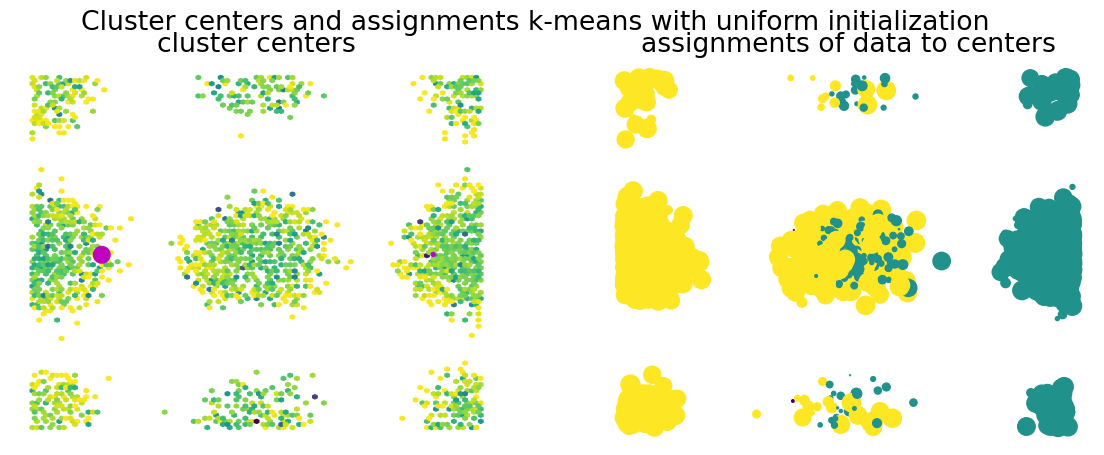

In [66]:
# Set initial centers and increase max iterations for the new clustering
estimator.initial_centers = clustering.cluster_centers
estimator.max_iter = 5000

# Perform new clustering with extended iterations
clustering_new = estimator.fit(omegas).fetch_model()

# Plot the new clustering results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
f.suptitle('Cluster centers and assignments k-means with uniform initialization')

ax1.hexbin(*(omegas.T), bins='log')
ax1.scatter(*(clustering_new.cluster_centers.T), marker='o', c='m')
ax1.axis('off')
ax1.set_title('cluster centers')

ax2.scatter(*(omegas[::10].T), c=clustering_new.transform(omegas)[::10])
ax2.axis('off')
ax2.set_title('assignments of data to centers')

plt.show()

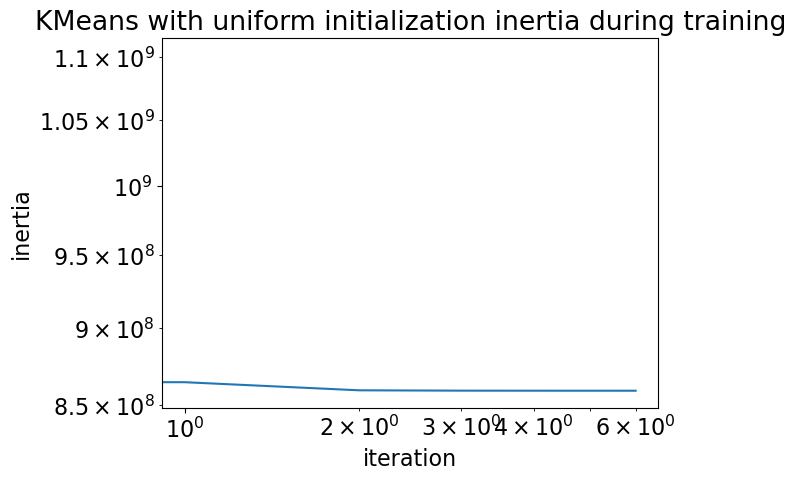

In [67]:
plt.loglog(clustering_new.inertias)
plt.xlabel("iteration")
plt.ylabel("inertia")
plt.title("KMeans with uniform initialization inertia during training");


In [50]:
def autocorr(x):
    tau = x.size
    mu = x.mean()
    g = np.correlate(x, x, mode='full')[tau-1:]
    n = np.arange(tau,0,-1)
    return g/n

avg_autocorrel = [] 
for residue in range(3):
    all_autocorrel = []
    for replica in range(6):
        # Example calculation, replace with your actual calculation
        cis_trans = np.where(all_omegas[replica,:,residue] > 90.0, 1.0, 0.0)
        print(f"residue {residue}, replica {replica}, cis_trans: {cis_trans}")
        
        all_autocorrel.append(autocorr(cis_trans))
    
    avg_autocorrel.append(np.array(all_autocorrel).mean(axis=0))
    outfile = f'omega_data/omega_autocorrel_residue{residue}.npy'
    print(f"Saving {outfile} ...")
    np.save(outfile, avg_autocorrel[-1])

residue 0, replica 0, cis_trans: [1. 1. 1. ... 1. 1. 1.]
residue 0, replica 1, cis_trans: [1. 1. 1. ... 1. 1. 1.]
residue 0, replica 2, cis_trans: [1. 1. 1. ... 1. 1. 1.]
residue 0, replica 3, cis_trans: [1. 1. 1. ... 1. 1. 1.]
residue 0, replica 4, cis_trans: [1. 1. 1. ... 1. 1. 1.]
residue 0, replica 5, cis_trans: [1. 1. 1. ... 1. 1. 1.]
Saving omega_data/omega_autocorrel_residue0.npy ...
residue 1, replica 0, cis_trans: [1. 1. 1. ... 0. 0. 0.]
residue 1, replica 1, cis_trans: [1. 1. 1. ... 0. 0. 0.]
residue 1, replica 2, cis_trans: [1. 1. 1. ... 0. 1. 1.]
residue 1, replica 3, cis_trans: [1. 1. 1. ... 0. 0. 0.]
residue 1, replica 4, cis_trans: [1. 1. 1. ... 1. 0. 0.]
residue 1, replica 5, cis_trans: [1. 1. 1. ... 0. 0. 0.]
Saving omega_data/omega_autocorrel_residue1.npy ...
residue 2, replica 0, cis_trans: [1. 1. 1. ... 0. 1. 1.]
residue 2, replica 1, cis_trans: [1. 1. 1. ... 0. 0. 1.]
residue 2, replica 2, cis_trans: [1. 1. 1. ... 1. 1. 1.]
residue 2, replica 3, cis_trans: [1. 1. 1

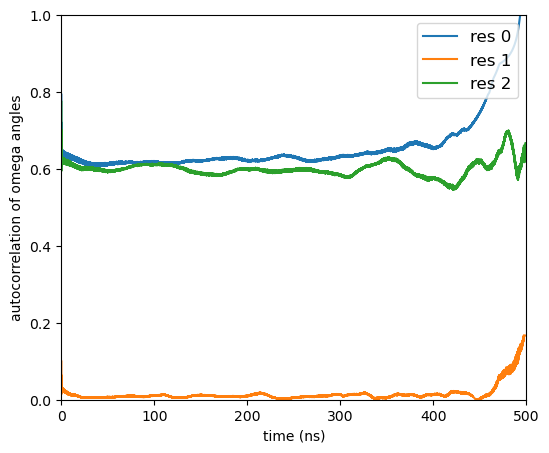

In [59]:
avg_autocorrels = []
plt.figure(figsize=(6,5))
t = np.arange(0, len(cis_trans))*0.010 # frames saved every 10 ps
for residue in range(0,3):   # the last residue
    infile = f'omega_data/omega_autocorrel_residue{residue}.npy'
    data = np.load(infile)
    avg_autocorrels.append(data)
    plt.plot(t, data, label='res %d'%residue)
    plt.xlim(0,500) # only show first part of the autocorrelation curves
    plt.ylim(0,1) # only show first part of the autocorrelation curves

plt.xlabel('time (ns)')
plt.ylabel('autocorrelation of omega angles')
plt.legend(loc='upper right', fontsize=12)

plt.show()

--- Residue 0 ---
### FIT to a0 + a1*exp(-(x/tau)) ###
Best-fit a0: 2418.6627622578876 +/- 60782549.7822274
Best-fit a1: -2418.053665976392 +/- 60782548.45237565
Best-fit tau: 25188017.61440144 +/- 6595370791135485.0
--- Residue 1 ---
### FIT to a0 + a1*exp(-(x/tau)) ###
Best-fit a0: 0.009277281218308776 +/- 2.9515010009115426e-10
Best-fit a1: 0.022205999841184217 +/- 7.945805113942268e-08
Best-fit tau: 5.593403864232853 +/- 0.010386384458443504
--- Residue 2 ---
### FIT to a0 + a1*exp(-(x/tau)) ###
Best-fit a0: 0.5960737287035115 +/- 7.062554788992503e-09
Best-fit a1: 0.015258450694692963 +/- 8.307482889099114e-08
Best-fit tau: 58.17409459854052 +/- 4.007122975685978


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_63571/23797525.py:7: RuntimeWarning: overflow encountered in exp
  return a0 + a1 * np.exp(-x / tau)


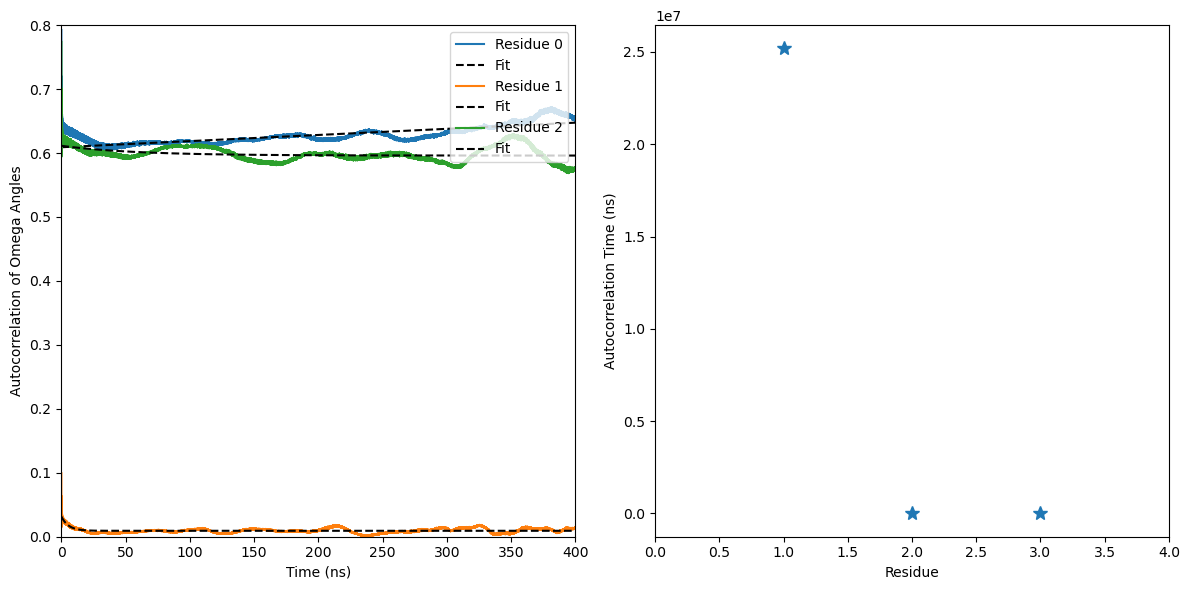

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Functional form for fitting
def single_exp_decay(x, a0, a1, tau):
    return a0 + a1 * np.exp(-x / tau)

# Fit each autocorrelation and plot results
fit_taus = []

plt.figure(figsize=(12, 6))

# Loop over each residue
for residue in range(3):
    
    # Initial guess for fitting parameters
    first_value = avg_autocorrels[residue][0]
    initial_guess = [first_value / 2.0, first_value / 2.0, 40.0]  # Initial guess [a0, a1, tau]
    
    # Perform curve fitting
    popt, pcov = curve_fit(single_exp_decay, t[:40000], avg_autocorrels[residue][:40000], p0=initial_guess)
    
    # Compute fitted curve
    y_fit = single_exp_decay(t[:40000], *popt)
    
    # Collect fitted tau values
    fit_taus.append(popt[2])
    
    # Print fit results
    print(f'--- Residue {residue} ---')
    print('### FIT to a0 + a1*exp(-(x/tau)) ###')
    print(f'Best-fit a0: {popt[0]} +/- {pcov[0][0]}')
    print(f'Best-fit a1: {popt[1]} +/- {pcov[1][1]}')
    print(f'Best-fit tau: {popt[2]} +/- {pcov[2][2]}')

    # Plot original data and fitted curve
    plt.subplot(1, 2, 1)
    plt.plot(t[:40000], avg_autocorrels[residue][:40000], label=f'Residue {residue}')
    plt.plot(t[:40000], y_fit, 'k--', label='Fit')
    plt.xlim(0, 400)
    plt.ylim(0, 0.8)
    plt.xlabel('Time (ns)')
    plt.ylabel('Autocorrelation of Omega Angles')
    plt.legend(loc='upper right', fontsize=10)
    
# Plotting the fitted tau values
plt.subplot(1, 2, 2)
plt.plot(range(1, 4), fit_taus, '*', markersize=10)
plt.xlim(0, 4)
plt.xlabel('Residue')
plt.ylabel('Autocorrelation Time (ns)')
plt.tight_layout()

plt.show()
